# **Exploration et Analyse des Données (EDA)**

**Aperçu des données :**
*   Chargement des premières lignes pour avoir une idée sur le contenu de la base





In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV




In [32]:

path='heart_data.csv'
df=pd.read_csv(path)
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0





*Les informations de dataframe*
---






1.   **Age** : Âge du participant (entier).
2.   **Gender** : Sexe du participant (homme/femme).
3.   **Height** : Taille mesurée en centimètres (entier).
4.   **Weight** : Poids mesuré en kilogrammes (entier).
5.   **Ap_hi** : Lecture de la pression artérielle systolique prise chez le patient (entier).
6.   **Ap_lo** : Lecture de la pression artérielle diastolique prise chez le patient (entier).
7.   **Cholesterol** : Niveau de cholestérol total mesuré en mg/dL sur une échelle de 0 à 5+ unités (entier). Chaque unité représente une augmentation/diminution de 20 mg/dL.
8.   **Gluc** : Niveau de glucose mesuré en mmol/L sur une échelle de 0 à 16+ unités (entier). Chaque unité représente une augmentation/diminution de 1 mmol/L.
9.   **Smoke** : Si la personne fume ou non (binaire ; 0 = Non, 1 = Oui).
10.  **Alco** : Si la personne consomme de l'alcool ou non (binaire ; 0 = Non, 1 = Oui).
11.  **Active** : Si la personne est physiquement active ou non (binaire ; 0 = Non, 1 = Oui).
12.  **Cardio** : Si la personne souffre de maladies cardiovasculaires ou non (binaire ; 0 = Non, 1 = Oui).



**Informations sur le type de données :**
*   voir le type de chaque colonne et les valeurs manquantes





In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB
None



*   Afficher le type de chaque colonne independamment




In [34]:
print(df.dtypes)

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


**Statistiques descriptives** :


*   comprendre la distribution et les valeurs extrêmes.




In [35]:
print(df.describe().T)

               count          mean           std      min       25%      50%  \
index        70000.0  34999.500000  20207.403759      0.0  17499.75  34999.5   
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      

# **Prétraitement des données**
**Analyse des Valeurs Manquantes :**
*   Afficher le nombre des éléments manquents par colonne



In [36]:
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

=> Pas des éléments manquants



*   Pourcentage de données manquantes par variable







In [37]:
valeurs_manquantes = df.isnull().sum()
pourcentage_manquantes = (valeurs_manquantes / len(df)) * 100
tableau_manquantes = pd.DataFrame({'Valeurs Manquantes': valeurs_manquantes, 'Pourcentage (%)': pourcentage_manquantes})
print(tableau_manquantes)

             Valeurs Manquantes  Pourcentage (%)
index                         0              0.0
id                            0              0.0
age                           0              0.0
gender                        0              0.0
height                        0              0.0
weight                        0              0.0
ap_hi                         0              0.0
ap_lo                         0              0.0
cholesterol                   0              0.0
gluc                          0              0.0
smoke                         0              0.0
alco                          0              0.0
active                        0              0.0
cardio                        0              0.0



*   Afficher une heatmap des valeurs manquantes




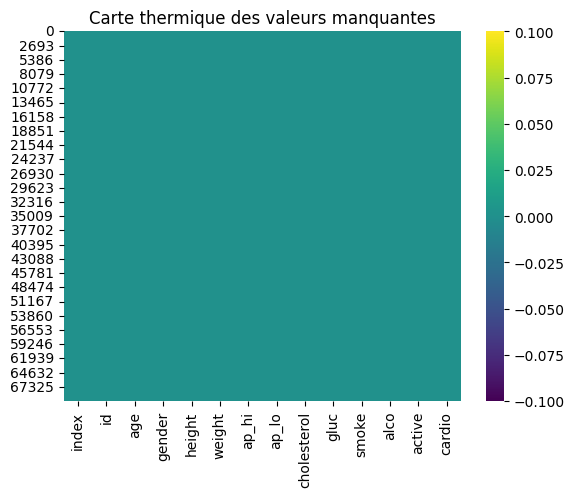

In [38]:

sns.heatmap(df.isnull(), cmap='viridis')
plt.title("Carte thermique des valeurs manquantes")
plt.show()

=>  Pour chaque variable , on n'a aucune valeurs manquantes



**Analyse des éléments duppliqués**

*   Suppression des éléments duppliqués



In [39]:
dup=df.duplicated().sum()
print("Le nombre de doublons: ",dup)
if dup>0:
    df.drop_duplicates()
else:
    print("Pas de supression car il n'ya pas des doublons")

Le nombre de doublons:  0
Pas de supression car il n'ya pas des doublons


**Supression des colonnes inutiles**

In [40]:
df.drop(['index','id'], axis = 1, inplace = True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Ajustement des valeurs**

-> Puisque la variable age est exprimé par jours , on va faire la conversion en ans

In [41]:
df['age'] = df['age'].apply(lambda x : int(x/365))
print(df['age'])

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64


In [42]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


=> informations plus compréhensible

**Calcule du coefficient de corrélation de Pearson entre chaque paire de variables numériques**

In [43]:
df_corr = df.corr()
print(df_corr)

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022913 -0.081506  0.053561  0.020854  0.017620   
gender      -0.022913  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081506  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053561  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020854  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017620  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154012 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098388 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047649  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029756  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009998  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.237985  0.008109 -0.010821  0.181660  0.054475  0.065719   

             cholesterol

* 1 : Indique une corrélation positive parfaite entre deux variables (elles augmentent ou diminuent ensemble).
* -1 : Indique une corrélation négative parfaite (quand une variable augmente, l'autre diminue).
* 0 : Indique qu'il n'y a pas de corrélation entre les variables.

**Visualisation de la matrice de corrélation avec un heatmap**

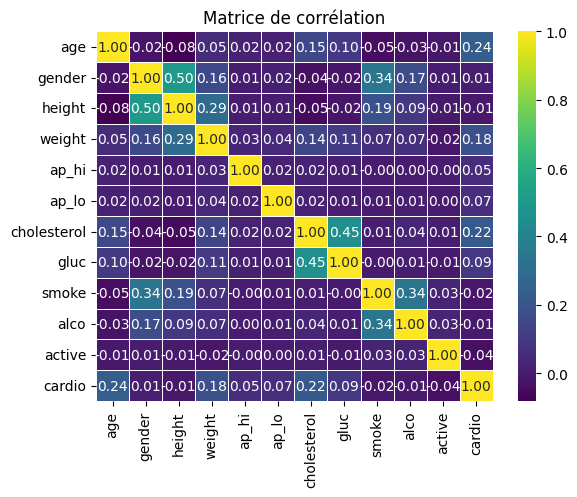

In [44]:
sns.heatmap(df_corr, cmap = 'viridis', annot = True , linecolor = 'white', linewidth = 0.5, fmt = '.2f')
plt.title("Matrice de corrélation")
plt.show()

**Visualisation de quelques relations entre les variables avec matplotlib**

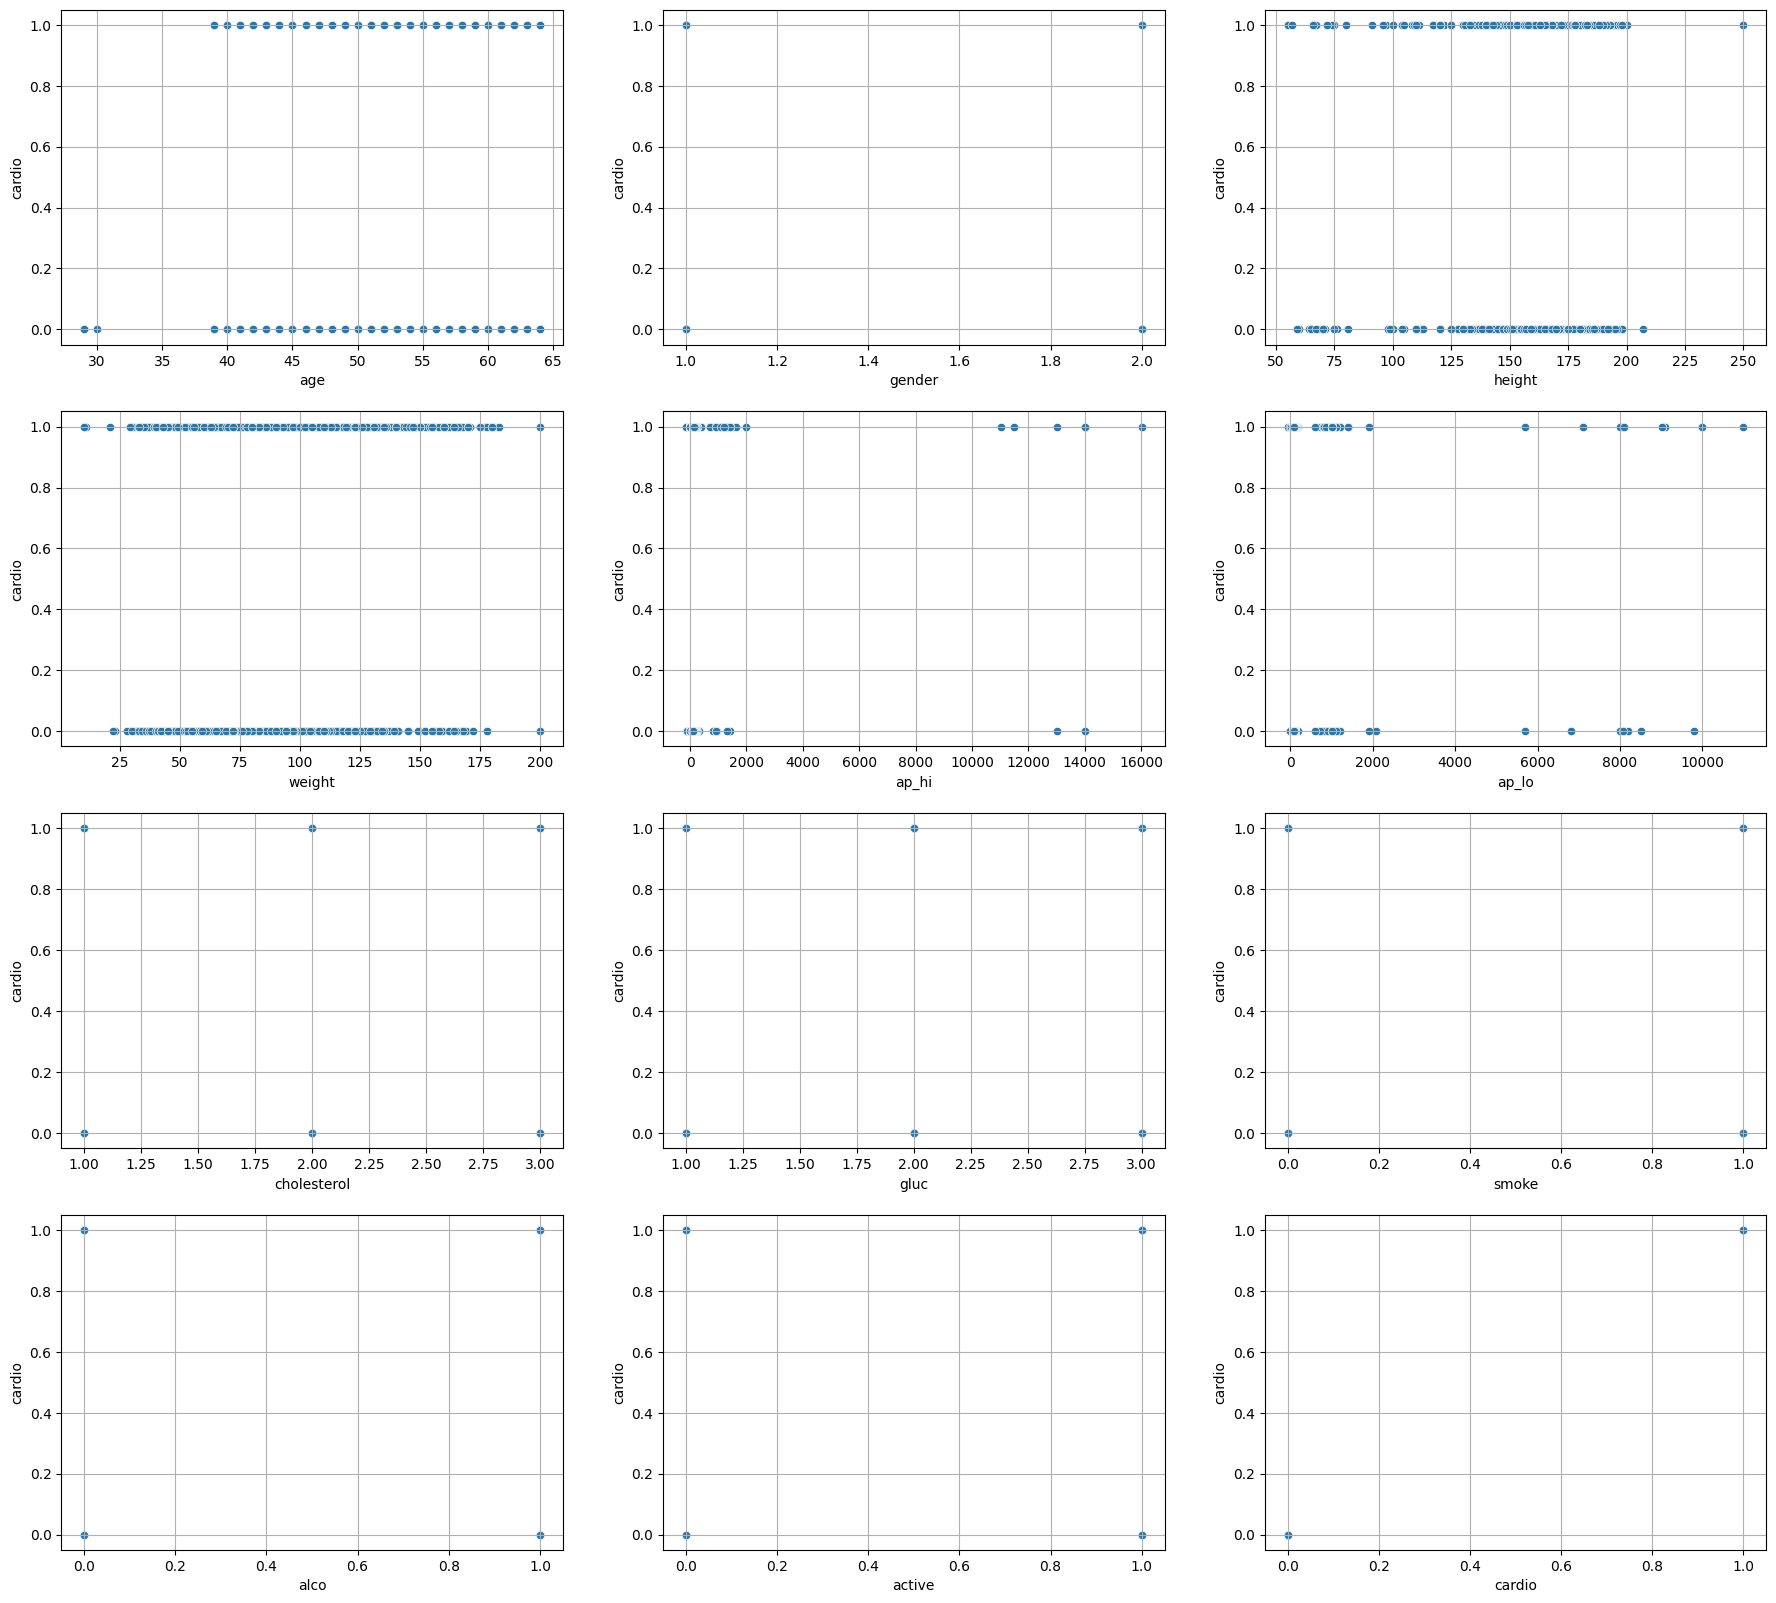

In [45]:
plt.figure(figsize = (22, 20))

for i in range(len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data = df, x = df.columns[i], y = 'cardio')
    plt.grid()

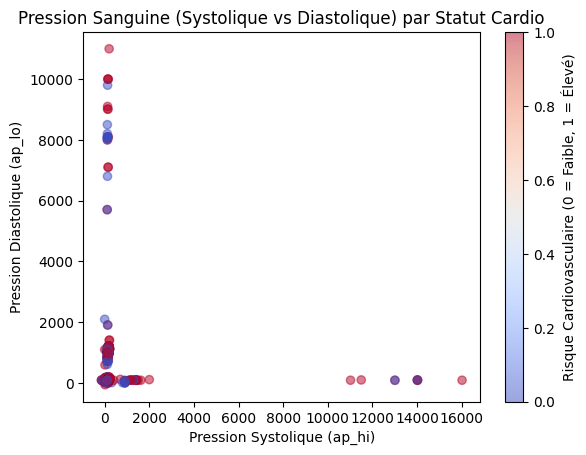

In [46]:

plt.scatter(x=df['ap_hi'], y=df['ap_lo'], c=df['cardio'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Risque Cardiovasculaire (0 = Faible, 1 = Élevé)')  # Customize label

plt.xlabel("Pression Systolique (ap_hi)")
plt.ylabel("Pression Diastolique (ap_lo)")
plt.title("Pression Sanguine (Systolique vs Diastolique) par Statut Cardio")

plt.show()

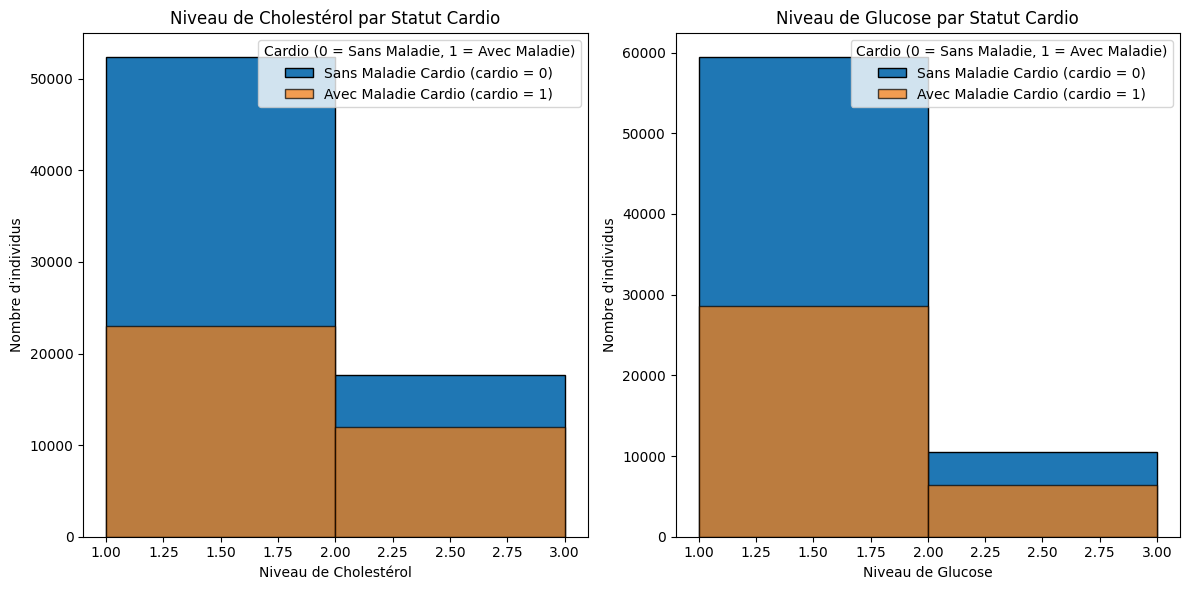

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

counts, bins, patches = axes[0].hist(df['cholesterol'], bins='auto', edgecolor='black', stacked=False, label='Sans Maladie Cardio (cardio = 0)')
axes[0].hist(df[df['cardio'] == 1]['cholesterol'], bins=bins, edgecolor='black', stacked=False, alpha=0.7, label='Avec Maladie Cardio (cardio = 1)')
axes[0].set_xlabel("Niveau de Cholestérol")
axes[0].set_ylabel("Nombre d'individus")
axes[0].set_title("Niveau de Cholestérol par Statut Cardio")
axes[0].legend(title='Cardio (0 = Sans Maladie, 1 = Avec Maladie)')

counts, bins, patches = axes[1].hist(df['gluc'], bins='auto', edgecolor='black', stacked=False, label='Sans Maladie Cardio (cardio = 0)')
axes[1].hist(df[df['cardio'] == 1]['gluc'], bins=bins, edgecolor='black', stacked=False, alpha=0.7, label='Avec Maladie Cardio (cardio = 1)')
axes[1].set_xlabel("Niveau de Glucose")
axes[1].set_ylabel("Nombre d'individus")
axes[1].set_title("Niveau de Glucose par Statut Cardio")
axes[1].legend(title='Cardio (0 = Sans Maladie, 1 = Avec Maladie)')

plt.tight_layout()
plt.show()

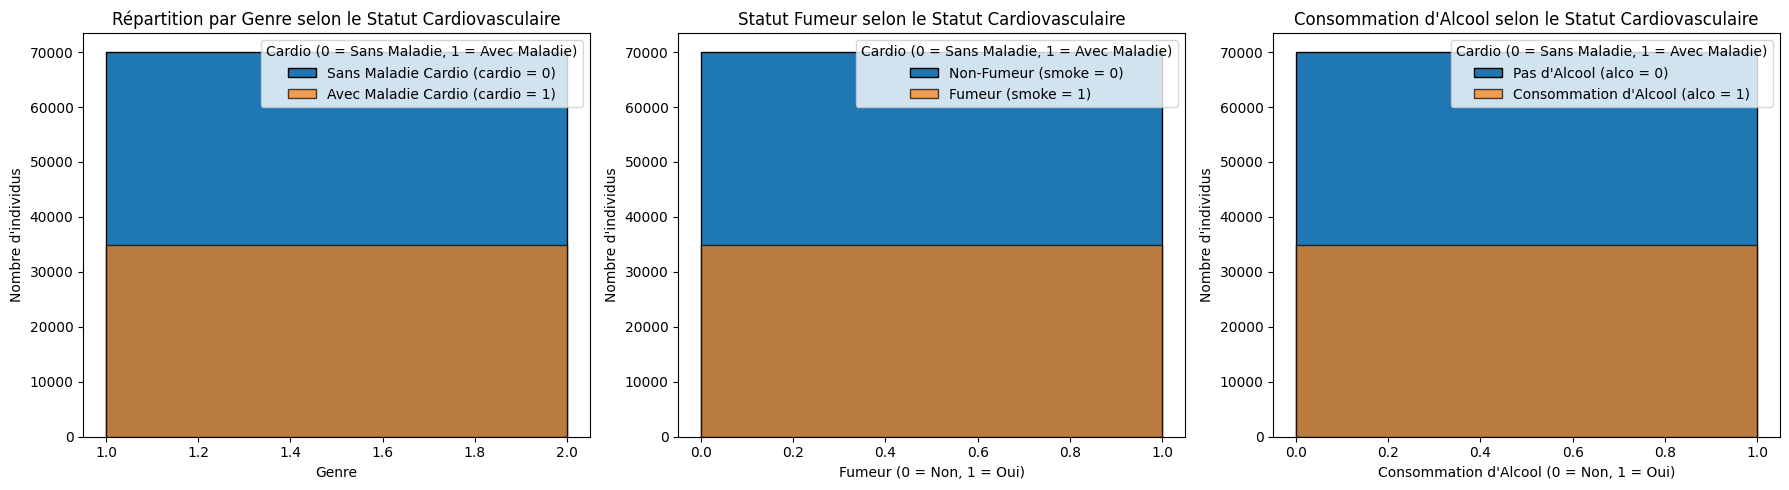

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

counts, bins, patches = axes[0].hist(df['gender'], bins='auto', edgecolor='black', stacked=False, label='Sans Maladie Cardio (cardio = 0)')
axes[0].hist(df[df['cardio'] == 1]['gender'], bins=bins, edgecolor='black', stacked=False, alpha=0.7, label='Avec Maladie Cardio (cardio = 1)')
axes[0].set_xlabel("Genre")
axes[0].set_ylabel("Nombre d'individus")
axes[0].set_title("Répartition par Genre selon le Statut Cardiovasculaire")
axes[0].legend(title='Cardio (0 = Sans Maladie, 1 = Avec Maladie)')

counts, bins, patches = axes[1].hist(df['smoke'], bins='auto', edgecolor='black', stacked=False, label='Non-Fumeur (smoke = 0)')
axes[1].hist(df[df['cardio'] == 1]['smoke'], bins=bins, edgecolor='black', stacked=False, alpha=0.7, label='Fumeur (smoke = 1)')
axes[1].set_xlabel("Fumeur (0 = Non, 1 = Oui)")
axes[1].set_ylabel("Nombre d'individus")
axes[1].set_title("Statut Fumeur selon le Statut Cardiovasculaire")
axes[1].legend(title='Cardio (0 = Sans Maladie, 1 = Avec Maladie)')

counts, bins, patches = axes[2].hist(df['alco'], bins='auto', edgecolor='black', stacked=False, label='Pas d\'Alcool (alco = 0)')
axes[2].hist(df[df['cardio'] == 1]['alco'], bins=bins, edgecolor='black', stacked=False, alpha=0.7, label='Consommation d\'Alcool (alco = 1)')
axes[2].set_xlabel("Consommation d'Alcool (0 = Non, 1 = Oui)")
axes[2].set_ylabel("Nombre d'individus")
axes[2].set_title("Consommation d'Alcool selon le Statut Cardiovasculaire")
axes[2].legend(title='Cardio (0 = Sans Maladie, 1 = Avec Maladie)')

plt.tight_layout()
plt.show()

**Normalisation des données**

Définir les caractéristiques (features) et la cible (target)

---



In [49]:
X = df.drop('cardio', axis=1)
y = df['cardio']

Normalisation des caractéristiques et les visualisée

---



In [50]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.419800,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
1,0.319110,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,-0.39572,-0.310879,-0.238384,0.494167
2,-0.272018,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,-0.39572,-0.310879,-0.238384,-2.023607
3,-0.715364,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,-0.39572,-0.310879,-0.238384,0.494167
4,-0.863146,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,-0.39572,-0.310879,-0.238384,-2.023607


visualisation des valeur de cible(sorties) pour être sûr qu'elles sont discrétes

---



In [51]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

# Application des algorithmes

Diviser les données en ensemble d'entraînement et de test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)



   

**1.   La régression logistique**








Initialiser et entraîner le modèle de régression logistique


---




In [53]:

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [54]:
y_pred_lr = lr.predict(X_test)

Calculer le score de précision sur les données de test

---




In [55]:

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.7095238095238096
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10430
           1       0.73      0.67      0.70     10570

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



Affichage de la matrice de confusion

---



In [56]:
conf_matrix=confusion_matrix(y_test,y_pred_lr)
conf_matrix


array([[7796, 2634],
       [3466, 7104]])

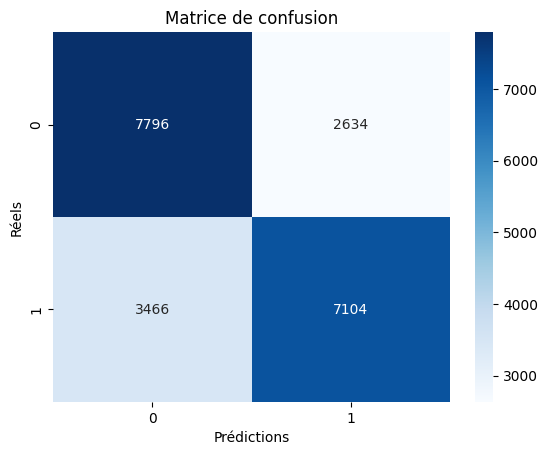

In [57]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Réels')
plt.title('Matrice de confusion')
plt.show()

*Grid Search pour la Régression Logistique*

In [58]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [59]:
lr = LogisticRegression()

In [60]:
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Convergen

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']},
             scoring='accuracy')




   


**2.   k-plus proches voisins (KNN)**








Entraîner le modèle sur les données d’apprentissage et Calculer le score de précision sur les données de test

---



In [63]:


for k in range(2,30,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_knn)
    print(f"Score de précision pour k={k} : {accuracy * 100:.2f}%")


Score de précision pour k=2 : 63.70%
Score de précision pour k=12 : 70.96%
Score de précision pour k=22 : 71.40%


Affichage de la matrice de confusion pour observer combien de prédictions correctes et incorrectes le modèle a effectuées


---





*   Pour k = 2




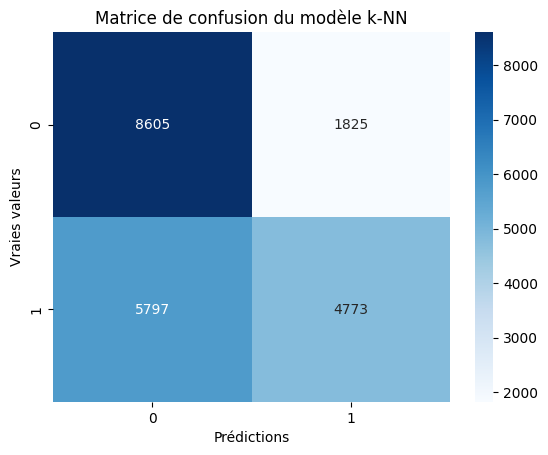

In [64]:


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion du modèle k-NN")
plt.show()



*   Pour k = 22




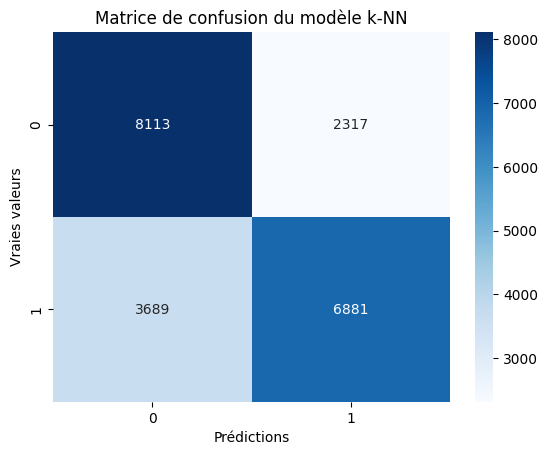

In [65]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion du modèle k-NN")
plt.show()

*GridSearsh pour le KNN*

In [66]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [67]:
knn = KNeighborsClassifier()


In [68]:
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

 **3.  Arbre de décision**

Initialiser et entraîner le modèle de Arbre de décision

---



In [71]:
clf = DecisionTreeClassifier(random_state=24)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=24)

Calculer le score de précision sur les données de test


---



In [72]:

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Score:", accuracy)
print("Rapport de classification:\n", report)

Score: 0.6359047619047619
Rapport de classification:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64     10430
           1       0.64      0.62      0.63     10570

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



=> Ce modèle est précis de 0,63 pour la classe 0 et 0,64 pour la classe 1, le rappel calculé pour la classe 0 est 0,65 et pour la classe 1 est 0,62

Affichage de la matrice de confusion pour observer combien de prédictions correctes et incorrectes le modèle a effectuées

---



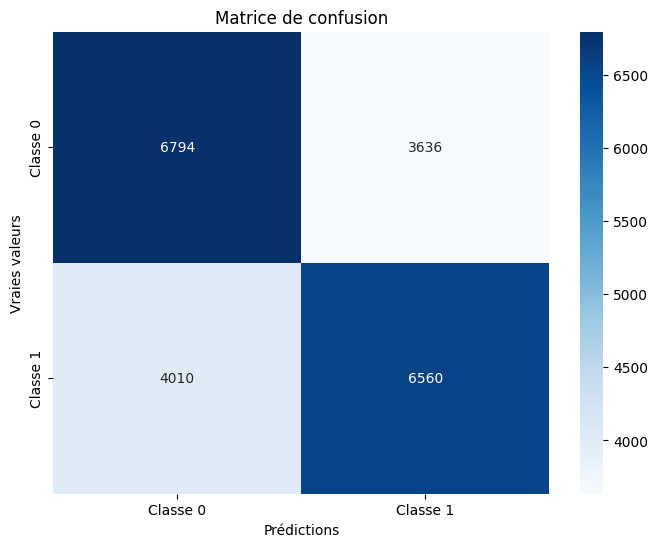

In [73]:

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion")
plt.show()


*GridSearsh pour L'arbre de Decision*

In [74]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [75]:
dt = DecisionTreeClassifier()


In [76]:
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

**4.Forêt aléatoire**

Initialiser et entraîner le modèle de Forêt aléatoire

---




In [79]:

rf_clf = RandomForestClassifier(random_state=24)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=24)

Calculer le score de précision sur les données de test

---

In [80]:

y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Score de Random Forest:", accuracy_rf)
print("Rapport de classification:\n", classification_report(y_test, y_pred_rf))

Score de Random Forest: 0.7083333333333334
Rapport de classification:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71     10430
           1       0.71      0.70      0.71     10570

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000



=> Ce modèle est précis de 0,7 pour la classe 0 et 0,71 pour la classe 1, le rappel calculé pour la classe 0 est 0,71 et pour la classe 1 est 0,7

Affichage de la matrice de confusion pour observer combien de prédictions correctes et incorrectes le modèle a effectuées

---



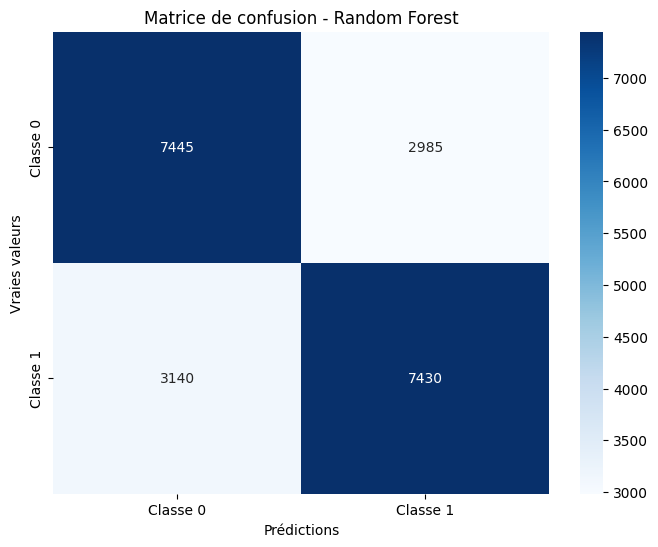

In [81]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de confusion - Random Forest")
plt.show()


*GridSearsh pour Random Forest*

In [82]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [83]:
rf = RandomForestClassifier()


In [84]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

**5.Gradient Boosting Machine (GBM)**

Création et entraînement du modèle GBM

---



In [87]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Prédictions avec le modèle GBM

---



In [88]:
y_pred_gbm = gbm.predict(X_test)

Évaluation du modèle GBM

---



In [89]:
print("Évaluation du modèle Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

Évaluation du modèle Gradient Boosting
Accuracy: 0.735904761904762
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10430
           1       0.76      0.70      0.73     10570

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



Matrice de confusion pour Gradient Boosting

---



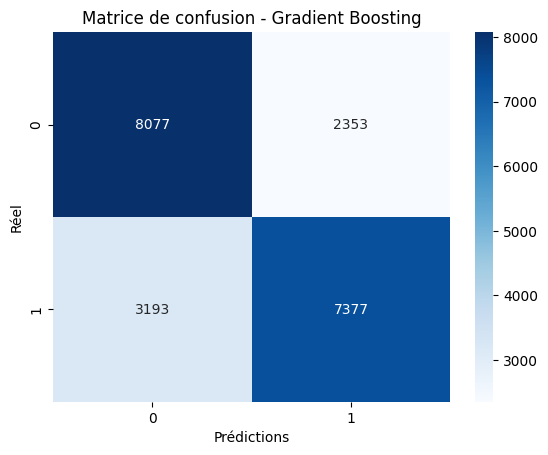

In [90]:
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - Gradient Boosting")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

*GridSearsh sur GBM*

In [91]:
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [92]:
gbm = GradientBoostingClassifier()


In [93]:
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

# comparaison et sélection de modèle

**Courbe de précision-rappel**

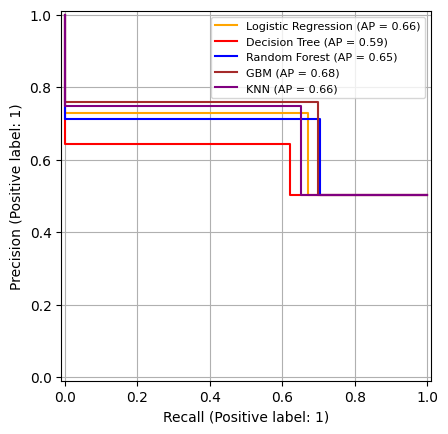

In [96]:

fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name = 'Decision Tree', ax = ax, color = 'red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_gbm, name = 'GBM', ax = ax, color = 'brown')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_knn, name = 'KNN', ax = ax, color = 'purple')
plt.grid()
plt.legend(fontsize = 8, loc = 'best')

**Courbe ROC (courbe caractéristique de fonctionnement du récepteur)**

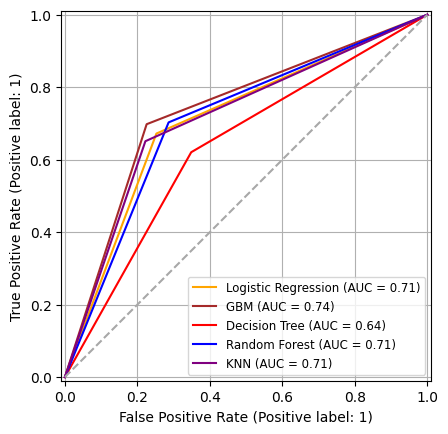

In [97]:
fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_lr, name = 'Logistic Regression', ax = ax, color = 'orange')
RocCurveDisplay.from_predictions(y_test, y_pred_gbm, name = 'GBM', ax = ax, color = 'brown')
RocCurveDisplay.from_predictions(y_test, y_pred, name = 'Decision Tree', ax = ax, color = 'red')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, name = 'Random Forest', ax = ax, color = 'blue')
RocCurveDisplay.from_predictions(y_test, y_pred_knn, name = 'KNN', ax = ax, color = 'purple')
plt.plot([0, 1], [0, 1], linestyle = "--", color = '#A8A8A8')
plt.grid()
plt.legend(fontsize = 8.5, loc = 'best')


In [113]:
best_scores = {
    'KNN': grid_search_knn.best_score_,
    'Random Forest': grid_search_rf.best_score_,
    'Decision Tree': grid_search_dt.best_score_,
    'Logistic Regression': grid_search_lr.best_score_,
    'GBM': grid_search_gbm.best_score_
}


In [114]:
print("Scores de validation croisée pour chaque modèle :\n")
for model_name, score in best_scores.items():
    print(f"{model_name} : {score:.4f}")

Scores de validation croisée pour chaque modèle :

KNN : 0.7069
Random Forest : 0.7351
Decision Tree : 0.7283
Logistic Regression : 0.7226
GBM : 0.7364


*le meilleur modèle en fonction des scores*

In [124]:
best_model_name = max(best_scores, key=best_scores.get)
best_grid_search = {
    'KNN': grid_search_knn,
    'Random Forest': grid_search_rf,
    'Decision Tree': grid_search_dt,
    'Logistic Regression': grid_search_lr,
    'GBM': grid_search_gbm
}[best_model_name]

In [122]:
best_params = {
    'KNN': grid_search_knn.best_params_,
    'Random Forest': grid_search_rf.best_params_,
    'Decision Tree': grid_search_dt.best_params_,
    'Logistic Regression': grid_search_lr.best_params_,
    'GBM': grid_search_gbm.best_params_
}

In [123]:
print("Scores de validation croisée et meilleurs hyperparamètres pour chaque modèle :\n")
for model_name, score in best_scores.items():
    print(f"{model_name} :")
    print(f"  Score : {score:.4f}")
    print(f"  Meilleurs hyperparamètres : {best_params[model_name]}")
    print()

Scores de validation croisée et meilleurs hyperparamètres pour chaque modèle :

KNN :
  Score : 0.7069
  Meilleurs hyperparamètres : {'n_neighbors': 9, 'weights': 'uniform'}

Random Forest :
  Score : 0.7351
  Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Decision Tree :
  Score : 0.7283
  Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_split': 5}

Logistic Regression :
  Score : 0.7226
  Meilleurs hyperparamètres : {'C': 10, 'solver': 'liblinear'}

GBM :
  Score : 0.7364
  Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}



In [126]:
best_model_name = max(best_scores, key=best_scores.get)
best_grid_search = {
    'KNN': grid_search_knn,
    'Random Forest': grid_search_rf,
    'Decision Tree': grid_search_dt,
    'Logistic Regression': grid_search_lr,
    'GBM': grid_search_gbm
}[best_model_name]

In [131]:
best_model = best_grid_search.best_estimator_


In [132]:
print(f"\nLe meilleur modèle selon les données d'entraînement est : {best_model_name}")
print(f"Meilleur modèle : {best_model}")
print(f"Score d'entraînement (cross-validation) : {best_scores[best_model_name]:.4f}")


Le meilleur modèle selon les données d'entraînement est : GBM
Meilleur modèle : GradientBoostingClassifier(max_depth=5)
Score d'entraînement (cross-validation) : 0.7364


*Tester le meilleur modèle sur les données de test*

In [133]:
test_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

In [135]:
print(f"\nPrécision du meilleur modèle ({best_model_name}) sur les données de test : {test_score:.4f}")
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred))


Précision du meilleur modèle (GBM) sur les données de test : 0.7348

Rapport de classification :

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10430
           1       0.76      0.69      0.73     10570

    accuracy                           0.73     21000
   macro avg       0.74      0.74      0.73     21000
weighted avg       0.74      0.73      0.73     21000

